In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))

sns.set(font_scale=1.3)
sklearn.__version__

'1.0.1'

### 1. Przygotowanie danych losowych z scikit learn

In [2]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [6]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [7]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

### 2. Prosta wizualizacja z matplotlib ( z tłem z seaborn)

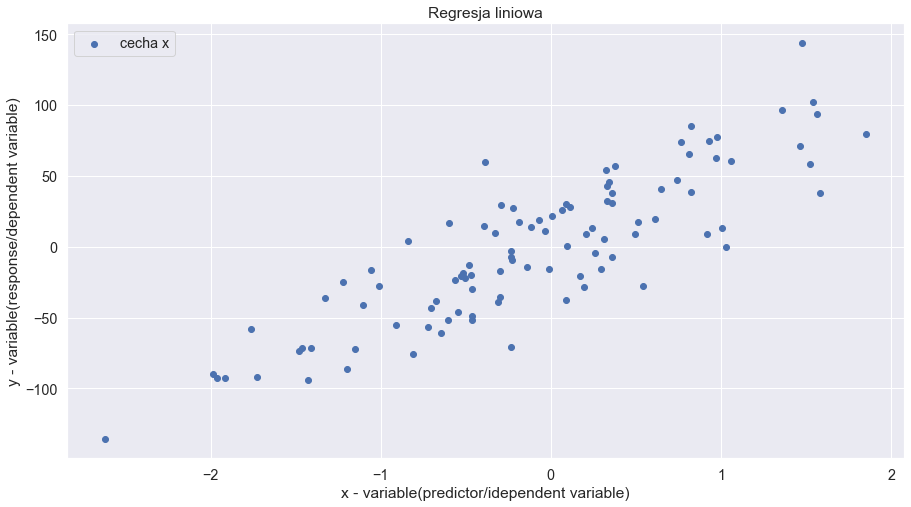

In [21]:
plt.figure(figsize=(15,8))
plt.title('Regresja liniowa')
plt.xlabel('x - variable(predictor/idependent variable)')
plt.ylabel('y - variable(response/dependent variable)')
plt.scatter (data, target, label='cecha x')
plt.legend()
plt.show()

### 3. Regresja liniowa przy użyciu sklearn



$Y = w_0 + w_1X_1$

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression()

# metoda fit dopasowuje model liniowy do danych

regressor.fit(data, target)

LinearRegression()

In [8]:
# metoda score() dokonuje oceny modelu na przekazanych danych (wynik R2 score) 

# im bliżej jedynki tym model jest lepiej dopasowany

regressor.score(data, target)

0.7426670084336404

In [9]:
# metoda predict() dokonuje predykcji na podstawie modelu

y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

### 4. Wizualizacja graficzna modelu:

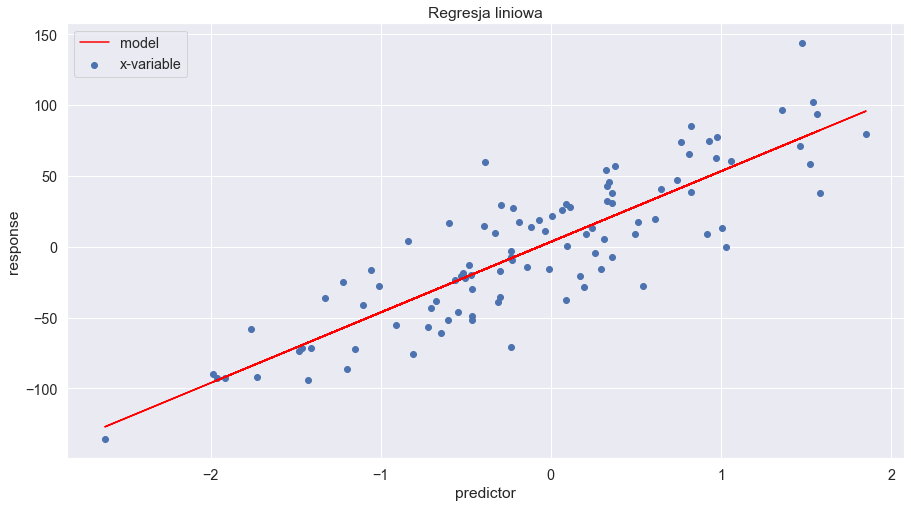

In [10]:
plt.figure(figsize=(15,8))
plt.title ('Regresja liniowa')
plt.xlabel ('predictor')
plt.ylabel ('response')
plt.scatter(data, target, label='x-variable')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

### 5. Współczynik R2 score:

In [11]:
regressor.score(data, target)

0.7426670084336404

Współczynnik $R^2$ jest zdefiniowany jako $1 - \frac{u}{v}$, gdzie $u$ jest określone wzorem

((y_true - y_pred) ** 2).sum()


**oraz $v$ jako**

((y_true - y_true.mean()) ** 2).sum()

**Czyli:**

1 - (((y_true - y_pred) ** 2).sum()) / (((y_true - y_true.mean()) ** 2).sum())









**Najlepszą możliwą wartością jest 1.0. $R^{2}$ może przyjmować wartość ujemną. Model, który przewiduje zawsze dla każdej próbki wartość oczekiwaną zmiennej docelowej ma współczynnik $R^2$ równy 0.**

#### - współczynnik R2 z utworzonej klasy 'regression' z sklearn

In [12]:
regressor.score(data, target)

0.7426670084336404

In [28]:
r2 = 1 - (((target - y_pred) ** 2).sum()) / (((target - target.mean()) ** 2).sum())
r2

0.7426670084336404

In [13]:
# dokopanie się do atrybutów modelu regressor:
[item for item in dir(regressor)]

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [14]:
# # dokopanie się do atrybutów modelu regressor z pominięciem '_'
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [15]:
# głównie interesują nas atrybuty coef i intercept (współczynnik w1 i w0)

In [25]:
regressor.coef_ # w1

array([49.83])

In [26]:
regressor.intercept_ # w0

3.4953459615809193

### <a name='5'></a> Końcowa postać modelu

$$Y = w_0 + w_1X_1$$
Postać modelu: $$Y = 3.495 + 49.83 \cdot X_1$$

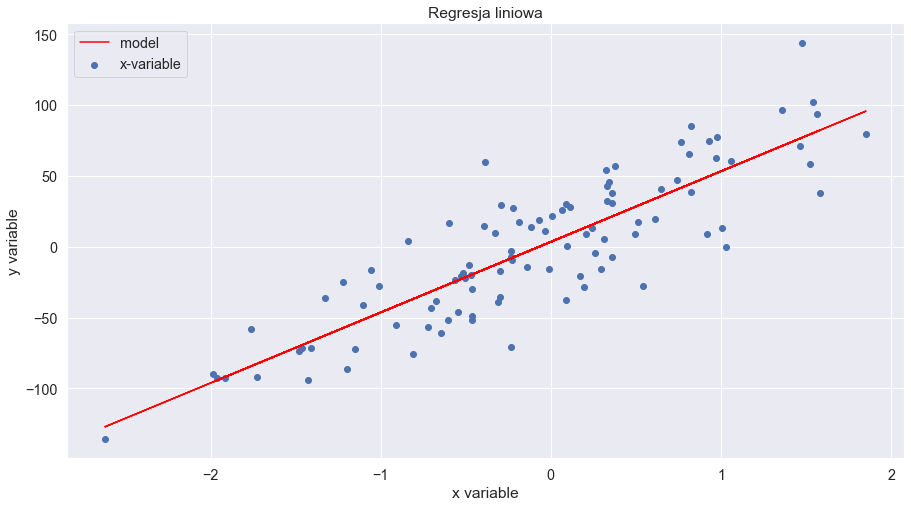

In [33]:
plt.figure(figsize=(15,8))
plt.title('Regresja liniowa')
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.scatter(data, target, label= 'x-variable')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()